In [1]:
import pandas as pd
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import GRU
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates


Using TensorFlow backend.


 <!DOCTYPE html>
<html>
<head>
<title>Stock Price Ananlysis </title>
</head>
<body>

<h1>RRN</h1>
</body>
</html>

In [2]:
prices = pd.read_csv('N:/Stock Prediction project/Micrisoft Dataset/New folder/Stock-Prediction-RNN-master/prices_stock.csv', index_col=['date'])


In [3]:

prices.index

Index(['2016-01-05 00:00:00', '2016-01-06 00:00:00', '2016-01-07 00:00:00',
       '2016-01-08 00:00:00', '2016-01-11 00:00:00', '2016-01-12 00:00:00',
       '2016-01-13 00:00:00', '2016-01-14 00:00:00', '2016-01-15 00:00:00',
       '2016-01-19 00:00:00',
       ...
       '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
       '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30 00:00:00',
       '2016-12-30 00:00:00'],
      dtype='object', name='date', length=851264)

In [4]:
prices


,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0


In [5]:
# selecting YHOO stocks
yahoo = prices[prices['symbol']=='YHOO']

In [6]:
# preparing input features
yahoo = yahoo.drop(['symbol'], axis=1)
yahoo = yahoo.drop(['volume'], axis=1)

#Preparing andropping columns
# square_stock = square_stock.drop('TRADING CODE', axis=1)
# square_stock = square_stock.drop('LTP*', axis=1)
# square_stock = square_stock.drop('YCP', axis=1)
# square_stock = square_stock.drop('TRADE', axis=1)
# square_stock = square_stock.drop('VALUE (mn)', axis=1)
# square_stock = square_stock.drop('VOLUME', axis=1)

In [9]:
yahoo = yahoo[['open', 'low', 'high', 'close']]

#Converting to numpy arrays
yahoo_nmp = yahoo.values



# plt.plot(yahoo_nmp[:,3],'-r')
# plt.ylabel("Closing Price")
# plt.xlabel("Index")
# plt.show()
# plt.plot(yahoo_nmp[:,2],yahoo_nmp[:,3],'.g')
# plt.ylabel("Closing Price")
# plt.xlabel("Hign")
# plt.show()



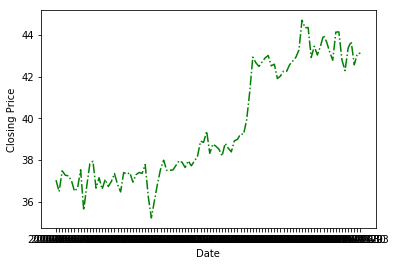

In [10]:
plt.plot(yahoo.index[1600:1700],yahoo_nmp[1600:1700,3],'-.g')
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.show()


In [13]:
# preparing label data
yahoo_shift = yahoo.shift(-1)
label = yahoo_shift['close']

#Square 
# square_shift = square_stock.shift(-1)
# square_label = square_shift['CLOSEP*']


In [14]:
#Resetting index
yahoo_shift.reset_index(drop=True)




,open,low,high,close
0,17.219999,17.000000,17.230000,17.230000
1,17.170000,17.070000,17.299999,17.170000
2,16.809999,16.570000,16.900000,16.700001
3,16.680000,16.620001,16.760000,16.700001
4,16.770000,16.480000,16.830000,16.740000
5,16.650000,16.600000,16.860001,16.680000
6,16.879999,16.650000,16.980000,16.900000
7,16.809999,16.799999,17.230000,17.120001
8,17.250000,16.750000,17.250000,16.820000
9,16.780001,16.639999,16.959999,16.750000


In [15]:
#Next Day Closing price is used as labeling
label
yahoo


,open,low,high,close
date,,,,
2010-01-04,16.940001,16.879999,17.200001,17.100000
2010-01-05,17.219999,17.000000,17.230000,17.230000
2010-01-06,17.170000,17.070000,17.299999,17.170000
2010-01-07,16.809999,16.570000,16.900000,16.700001
2010-01-08,16.680000,16.620001,16.760000,16.700001
2010-01-11,16.770000,16.480000,16.830000,16.740000
2010-01-12,16.650000,16.600000,16.860001,16.680000
2010-01-13,16.879999,16.650000,16.980000,16.900000
2010-01-14,16.809999,16.799999,17.230000,17.120001


In [16]:
# adjusting the shape of both
yahoo.drop(yahoo.index[len(yahoo)-1], axis=0, inplace=True)
label.drop(label.index[len(label)-1], axis=0, inplace=True)

In [17]:
train_start_date = '2016-01-03'
train_end_date = '2017-01-01'
test_start_date = '2017-01-02'
test_end_date = '2018-11-29'

In [18]:
trainX = yahoo.loc[train_start_date:train_end_date]
testX = yahoo.loc[test_start_date:test_end_date]
trainY = label.loc[train_start_date:train_end_date]
testY = label.loc[test_start_date:test_end_date]





In [19]:
# conversion to numpy array x-Features y-labels
x, y = yahoo.values, label.values

#Plotting label(Closing Price) against Date
# plt.plot(yahoo.index,y,'-.g')
# plt.ylabel("Closing Price")
# plt.xlabel("Date")
# plt.show()
# y

In [20]:
# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

In [21]:
X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y.reshape(-1,1))

In [22]:
X[:1,:]

array([[0.13762814, 0.14278666, 0.13228812, 0.14559109]])

In [23]:
# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
X_train = X_train.reshape((-1,1,4))
X_test = X_test.reshape((-1,1,4))

print('x_train shape:',X_train.shape)
print('Number of samples in x_train', X_train.shape[0])
print('Number of samples in x_test', X_test.shape[0])

print('Y_train shape:',y_train.shape)


x_train shape: (1179, 1, 4)
Number of samples in x_train 1179
Number of samples in x_test 582
Y_train shape: (1179, 1)


In [24]:
X_test

array([[[0.07881894, 0.06880395, 0.06712396, 0.07146318]],

       [[0.66300639, 0.6697904 , 0.67613921, 0.68289728]],

       [[0.09272816, 0.097164  , 0.08623224, 0.09883721]],

       ...,

       [[0.11908248, 0.12182494, 0.10803525, 0.122093  ]],

       [[0.57662276, 0.58594325, 0.57471824, 0.58236438]],

       [[0.0954124 , 0.09667078, 0.08549731, 0.09859496]]])

In [25]:
y_test

array([[0.06661822],
       [0.70469963],
       [0.10586241],
       [0.11506783],
       [0.10658915],
       [0.70421513],
       [0.13565894],
       [0.80789728],
       [0.4852229 ],
       [0.12257752],
       [0.10755814],
       [0.11361434],
       [0.27252908],
       [0.77979651],
       [0.13905039],
       [0.64752909],
       [0.81419578],
       [0.05789729],
       [0.12378879],
       [0.13711241],
       [0.37427329],
       [0.4949128 ],
       [0.76501935],
       [0.11724806],
       [0.10780039],
       [0.04675388],
       [0.04287791],
       [0.93338178],
       [0.05668605],
       [0.77737405],
       [0.07025194],
       [0.71608534],
       [0.61482562],
       [0.63783911],
       [0.09932171],
       [0.10004845],
       [0.07437016],
       [0.08575582],
       [0.10562016],
       [0.64777138],
       [0.88517446],
       [0.73110467],
       [0.69210273],
       [0.26453489],
       [0.11506783],
       [0.09156977],
       [0.07873062],
       [0.015

In [26]:
# creating model using Keras
# tf.reset_default_graph()

model_name = 'stock_price_GRU'

model = Sequential()
model.add(GRU(units=512,return_sequences=True,input_shape=(1, 4)))
model.add(Dropout(0.2))
model.add(GRU(units=256))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

In [27]:
model.fit(X_train,y_train,batch_size=250, epochs=500, validation_split=0.1, verbose=1)
model.save("{}.h5".format(model_name))
print('MODEL-SAVED')

Train on 1061 samples, validate on 118 samples
Epoch 1/500
1061/1061 [==============================] - 2s 2ms/step - loss: 0.0826 - val_loss: 0.0725
Epoch 2/500
1061/1061 [==============================] - 0s 267us/step - loss: 0.0709 - val_loss: 0.0590
Epoch 3/500
1061/1061 [==============================] - 0s 274us/step - loss: 0.0542 - val_loss: 0.0397
Epoch 4/500
1061/1061 [==============================] - 0s 272us/step - loss: 0.0339 - val_loss: 0.0179
Epoch 5/500
1061/1061 [==============================] - 0s 276us/step - loss: 0.0129 - val_loss: 0.0038
Epoch 6/500
1061/1061 [==============================] - 0s 284us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 7/500
1061/1061 [==============================] - 0s 277us/step - loss: 0.0013 - val_loss: 0.0022
Epoch 8/500
1061/1061 [==============================] - 0s 284us/step - loss: 0.0028 - val_loss: 0.0031
Epoch 9/500
1061/1061 [==============================] - 0s 273us/step - loss: 0.0030 - val_loss: 0.0026
Epoch 10/5

1061/1061 [==============================] - 0s 261us/step - loss: 6.6781e-04 - val_loss: 4.6343e-04
Epoch 145/500
1061/1061 [==============================] - 0s 254us/step - loss: 6.3538e-04 - val_loss: 4.6146e-04
Epoch 146/500
1061/1061 [==============================] - 0s 258us/step - loss: 6.6570e-04 - val_loss: 4.8128e-04
Epoch 147/500
1061/1061 [==============================] - 0s 250us/step - loss: 6.8213e-04 - val_loss: 5.7753e-04
Epoch 148/500
1061/1061 [==============================] - 0s 258us/step - loss: 7.1244e-04 - val_loss: 4.7598e-04
Epoch 149/500
1061/1061 [==============================] - 0s 261us/step - loss: 6.8033e-04 - val_loss: 5.2461e-04
Epoch 150/500
1061/1061 [==============================] - 0s 264us/step - loss: 7.0797e-04 - val_loss: 5.1979e-04
Epoch 151/500
1061/1061 [==============================] - 0s 260us/step - loss: 6.7565e-04 - val_loss: 4.5458e-04
Epoch 152/500
1061/1061 [==============================] - 0s 284us/step - loss: 7.0266e-04 - 

1061/1061 [==============================] - 0s 258us/step - loss: 6.7643e-04 - val_loss: 4.3134e-04
Epoch 287/500
1061/1061 [==============================] - 0s 252us/step - loss: 6.6301e-04 - val_loss: 4.3884e-04
Epoch 288/500
1061/1061 [==============================] - 0s 252us/step - loss: 6.6192e-04 - val_loss: 4.9583e-04
Epoch 289/500
1061/1061 [==============================] - 0s 253us/step - loss: 6.7691e-04 - val_loss: 4.4102e-04
Epoch 290/500
1061/1061 [==============================] - 0s 262us/step - loss: 6.4225e-04 - val_loss: 4.4822e-04
Epoch 291/500
1061/1061 [==============================] - 0s 268us/step - loss: 6.6141e-04 - val_loss: 4.3143e-04
Epoch 292/500
1061/1061 [==============================] - 0s 267us/step - loss: 6.3084e-04 - val_loss: 4.3572e-04
Epoch 293/500
1061/1061 [==============================] - 0s 262us/step - loss: 6.5409e-04 - val_loss: 4.6897e-04
Epoch 294/500
1061/1061 [==============================] - 0s 259us/step - loss: 6.7549e-04 - 

1061/1061 [==============================] - 0s 235us/step - loss: 6.6964e-04 - val_loss: 5.4764e-04
Epoch 429/500
1061/1061 [==============================] - 0s 227us/step - loss: 6.7775e-04 - val_loss: 4.9151e-04
Epoch 430/500
1061/1061 [==============================] - 0s 235us/step - loss: 6.4775e-04 - val_loss: 4.1809e-04
Epoch 431/500
1061/1061 [==============================] - 0s 235us/step - loss: 6.3661e-04 - val_loss: 4.4444e-04
Epoch 432/500
1061/1061 [==============================] - 0s 229us/step - loss: 6.1786e-04 - val_loss: 4.2166e-04
Epoch 433/500
1061/1061 [==============================] - 0s 233us/step - loss: 6.3523e-04 - val_loss: 4.2756e-04
Epoch 434/500
1061/1061 [==============================] - 0s 235us/step - loss: 6.5239e-04 - val_loss: 4.8423e-04
Epoch 435/500
1061/1061 [==============================] - 0s 235us/step - loss: 6.5484e-04 - val_loss: 4.3026e-04
Epoch 436/500
1061/1061 [==============================] - 0s 241us/step - loss: 6.8439e-04 - 

In [33]:
#Load saved Model
model = load_model("{}.h5".format(model_name))
print("MODEL-LOADED")

MODEL-LOADED


In [34]:
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

582/582 [==============================] - 0s 654us/step
Score: 0.0005604520740541166


In [35]:
X_test.size


2328

In [36]:
yhata = model.predict(X_test)
yhata_inverse = y_scale.inverse_transform(yhata)
y_test_inverse = y_scale.inverse_transform(y_test)

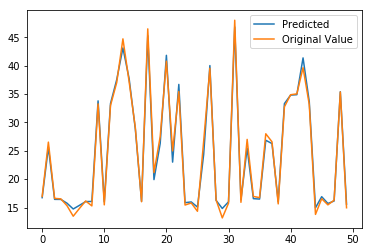

In [56]:
plt.plot(yhata_inverse[-50:], label='Predicted')
plt.plot(y_test_inverse[-50:], label='Original Value')
plt.legend()
plt.show()

In [46]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test_inverse, yhata_inverse)
print('Test MSE: %.3f' % error)


Test MSE: 0.955
